In [4]:
#data format
def NemoCfgMongoClient():
    #user = "root"
    #pw   = "bYKH2Utx47Nw4P"
    host = "0.0.0.0"
    port = 27017
    from pymongo import MongoClient
    uri = "mongodb://%s:%s" % (host, port)
    client = MongoClient(uri)
    return client
client = NemoCfgMongoClient()
X = []
Y = []
def in_data_format(doc):
    return [float(doc["home_water"]),float(doc["guest_water"]),float(doc["win_rate"]),float(doc["draw_rate"]),float(doc["lost_rate"])]
def out_data_format(doc):
    result = doc["score"].split(":")
    home_score = int(result[0])
    guest_socre = int(result[1])
    if home_score>guest_socre:
        return 3
    elif home_score==guest_socre:
        return 1
    else:
        return 0
    
for doc in client.data_500wan.games.find():
    try:
        X.append(in_data_format(doc))
        Y.append(out_data_format(doc))
    except:
        print doc
        continue
print len(X)
print len(Y)

85013
85013


In [1]:
from  sklearn import preprocessing  
scaler=preprocessing.StandardScaler().fit(X) 
X_New=scaler.transform(X) 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_New, Y, train_size = 0.8,random_state=2) #train 70%, test 30%




NameError: name 'X' is not defined

In [8]:
#Decesion Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
print( clf.score(X_test, Y_test) )

0.41742286751361163


In [22]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf = clf.fit(X_train, Y_train)
print( clf.score(X_test, Y_test))

0.5335753176043557


In [23]:
print scaler.transform([[0.98,0.95,4.0,3.8,1.95]])
in_data = scaler.transform([[0.98,0.95,4.0,3.8,1.95]])
print clf.predict(in_data)
print clf.predict_proba(in_data)

print scaler.transform([[1.089,0.81,2.9,3.3,2.62]])
in_data = scaler.transform([[1.089,0.81,2.9,3.3,2.62]])
print clf.predict(in_data)
print clf.predict_proba(in_data)

print scaler.transform([[1.0,0.85,1.66,4.0,4.75]])
in_data = scaler.transform([[1.0,0.85,1.66,4.0,4.75]])
print clf.predict(in_data)
print clf.predict_proba(in_data)

[[ 0.21838624 -0.12440969  0.75418843 -0.10087233 -0.75087186]]
[0]
[[0.36704811 0.34804478 0.28490711]]
[[ 1.28881034 -1.48443027  0.11968603 -0.57362548 -0.56843575]]
[0]
[[0.36309221 0.32204917 0.31485861]]
[[ 0.41479433 -1.09585296 -0.59557121  0.08822893  0.0115477 ]]
[3]
[[0.23021925 0.17514119 0.59463956]]


In [16]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
clf = clf.fit(X_train, Y_train)
print( clf.score(X_test, Y_test) )

0.5190562613430127


In [17]:
print scaler.transform([[0.98,0.95,4.0,3.8,1.95]])
in_data = scaler.transform([[0.98,0.95,4.0,3.8,1.95]])
print clf.predict(in_data)
print clf.predict_proba(in_data)

[[ 0.21838624 -0.12440969  0.75418843 -0.10087233 -0.75087186]]
[0]


AttributeError: predict_proba is not available when  probability=False

In [2]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/usr/lib64/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[[ 1.62434536]
 [-0.61175641]
 [-0.52817175]
 [-1.07296862]
 [ 0.86540763]
 [-2.3015387 ]
 [ 1.74481176]
 [-0.7612069 ]
 [ 0.3190391 ]
 [-0.24937038]
 [ 1.46210794]
 [-2.06014071]
 [-0.3224172 ]
 [-0.38405435]
 [ 1.13376944]
 [-1.09989127]
 [-0.17242821]
 [-0.87785842]
 [ 0.04221375]
 [ 0.58281521]
 [-1.10061918]
 [ 1.14472371]
 [ 0.90159072]
 [ 0.50249434]
 [ 0.90085595]
 [-0.68372786]
 [-0.12289023]
 [-0.93576943]
 [-0.26788808]
 [ 0.53035547]
 [ 4.30833925]
 [ 4.60324647]
 [ 4.3128273 ]
 [ 4.15479436]
 [ 4.32875387]
 [ 4.9873354 ]
 [ 3.88268965]
 [ 5.2344157 ]
 [ 6.65980218]
 [ 5.74204416]
 [ 4.80816445]
 [ 4.11237104]
 [ 4.25284171]
 [ 6.6924546 ]
 [ 5.05080775]
 [ 4.36300435]
 [ 5.19091548]
 [ 7.10025514]
 [ 5.12015895]
 [ 5.61720311]
 [ 5.30017032]
 [ 4.64775015]
 [ 3.8574818 ]
 [ 4.65065728]
 [ 4.79110577]
 [ 5.58662319]
 [ 5.83898341]
 [ 5.93110208]
 [ 5.28558733]
 [ 5.88514116]
 [ 4.24560206]
 [ 6.25286816]
 [ 5.51292982]
 [ 4.70190716]
 [ 5.48851815]
 [ 4.92442829]
 [ 6.13162

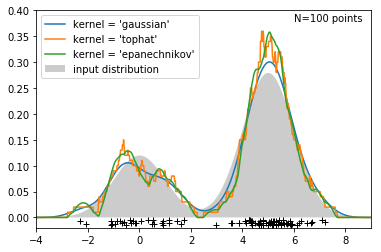

In [3]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

#----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

print X

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')

for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()